# Los Angeles Earthquake Magnitude Classification

In this notebook we use the Los Angeles Earthquake Dataset to classify the magnitude of earthquakes on the Richter scale. The dataset contains information from January 1, 2012 to September 1, 2024 and was found on Kaggle.com.

We plan on classifying the data using three different models: logistic regression, support vector machine (SVM), and neural networks.

**Dataset :** [Los Angeles Earthquake dataset](https://www.kaggle.com/datasets/batuhankalem/los-angeles-earthquake-dataset/data)

## Preprocessing

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler  # It is important in neural networks to scale the date
from sklearn.model_selection import train_test_split, cross_val_score  # The standard - train/test to prevent overfitting and choose hyperparameters
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score # 
from sklearn import datasets, linear_model
from sklearn import linear_model
# remove later (allows untruncated printing for ease of testing/debugging)
import sys

### Importing the data

In [25]:
# read the data and split the data into X and y
df = pd.read_csv('LosAngeles_Earthquake_Dataset-removed-0s.csv', delimiter=',')
feature_names = df[:0].columns


In [26]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22560 entries, 0 to 22559
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   latitude                        22560 non-null  float64
 1   longitude                       22560 non-null  float64
 2   clustering_coefficient_30_days  22560 non-null  float64
 3   std_mag_30_days                 22560 non-null  float64
 4   rolling_mean_depth_30_days      22560 non-null  float64
 5   earthquakes_last_30_days        22560 non-null  int64  
 6   b_value                         22560 non-null  float64
 7   b_value_increment_i_i2          22560 non-null  float64
 8   b_value_increment_i2_i4         22560 non-null  float64
 9   b_value_increment_i4_i6         22560 non-null  float64
 10  b_value_increment_i6_i8         22560 non-null  float64
 11  b_value_increment_i8_i10        22560 non-null  float64
 12  max_mag_last_week               

,latitude,longitude,clustering_coefficient_30_days,std_mag_30_days,rolling_mean_depth_30_days,earthquakes_last_30_days,b_value,b_value_increment_i_i2,b_value_increment_i2_i4,b_value_increment_i4_i6,b_value_increment_i6_i8,b_value_increment_i8_i10,max_mag_last_week,eta,delta_M,elapsed_time,coefficient_of_variation,dE1_2,mag,class
count,22560.000000,22560.000000,22560.000000,22560.000000,22560.000000,22560.000000,22560.000000,22560.000000,2.256000e+04,22560.000000,22560.000000,22560.000000,22560.000000,22560.000000,22560.000000,2.256000e+04,22560.000000,2.256000e+04,22560.000000,22560.000000
mean,34.098200,-117.774406,0.866124,0.519413,9.604852,189.514229,0.566605,-0.000038,-4.229818e-05,-0.000040,0.000007,0.000038,2.011582,0.183598,-1.503916,8.577594e+05,1.178257,1.030400e+05,1.242844,2.766312
std,0.217868,0.557548,0.047046,0.068517,1.686750,169.383933,0.123334,0.036503,5.141092e-02,0.062720,0.072224,0.080384,0.596932,0.012151,0.774870,3.851648e+05,0.287685,2.551393e+05,0.533198,1.371892
min,33.191833,-119.320667,0.000000,0.000000,0.000000,0.000000,0.293007,-0.421920,-4.418203e-01,-0.450243,-0.460616,-0.455649,0.760000,0.159844,-4.692859,3.827500e+03,0.696293,1.229661e+04,-0.340000,1.000000
25%,34.001333,-118.135750,0.832248,0.469151,9.147655,122.000000,0.478912,-0.009485,-1.567671e-02,-0.021010,-0.026216,-0.031273,1.600000,0.174238,-1.970766,6.766993e+05,1.005825,2.896820e+04,0.880000,2.000000
50%,34.054167,-117.538417,0.857247,0.508384,9.985026,143.000000,0.555215,0.000124,-1.110000e-16,0.000139,0.000273,0.000264,1.910000,0.181130,-1.453130,8.875700e+05,1.120798,4.332824e+04,1.130000,3.000000
75%,34.207833,-117.313000,0.890450,0.560526,10.516310,178.000000,0.642068,0.009799,1.625191e-02,0.021854,0.027422,0.032245,2.320000,0.190707,-0.999805,1.095103e+06,1.272087,7.783336e+04,1.510000,4.000000
max,34.942167,-117.158333,0.992260,0.765815,15.568651,1227.000000,1.117587,0.420602,4.704251e-01,0.473283,0.474226,0.474092,5.496776,0.236607,1.157047,2.365254e+06,6.284059,3.337624e+06,5.496776,6.000000


##### Before we do any analysis on the data, we will first separate our target from the dataset so it doesn't get considered in principle component analysis.
We also reshape y to be a 2d array for future computation purposes.

In [27]:
data = df.to_numpy()
X = data[:,:19]
y = data[:,19]

y = y.reshape(-1,1) # reshape y to be a 2d array bc/ X was already 2d, but y was one column
print("X has shape: ", X.shape)
print("y has shape: ", y.shape)

X has shape:  (22560, 19)
y has shape:  (22560, 1)


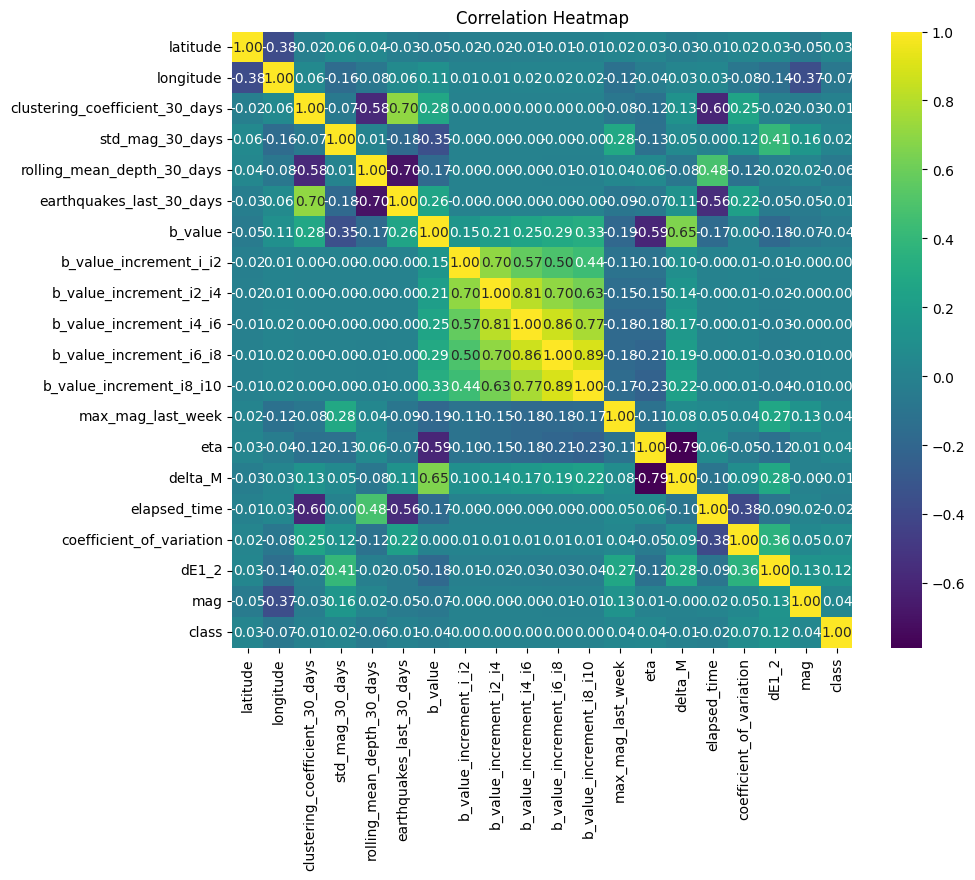

In [28]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='viridis', annot=True, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

##### We will then scale our data to ensure PCA does not favor certain features over others.

In [29]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

##### We will now do Principle Component Analysis (PCA)

In [30]:
pca = PCA()
pca_data = pca.fit_transform(scaled_data)

Text(0.5, 1.0, 'n_components vs. Explained Variance Ratio')

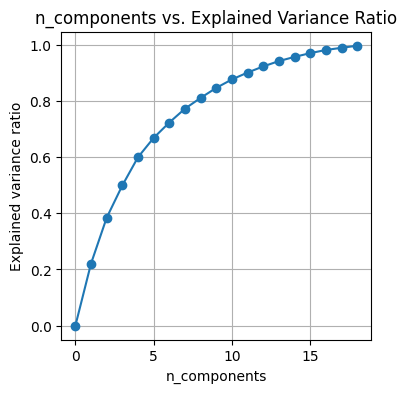

In [31]:
var_ratio = []
num_components = np.arange(pca_data.shape[1])
for num in num_components:
    pca = PCA(n_components=num)
    pca.fit(scaled_data)
    var_ratio.append(np.sum(pca.explained_variance_ratio_))

plt.figure(figsize=(4,4))
plt.grid(True)
plt.plot(num_components,var_ratio,marker='o')
plt.xlabel('n_components')
plt.ylabel('Explained variance ratio')
plt.title('n_components vs. Explained Variance Ratio')

In [32]:
pca = PCA(n_components=10)
pca.fit(scaled_data)
print("The explained variance ratio when reducing the number of components to 10 is: \n",np.sum(pca.explained_variance_ratio_))

The explained variance ratio when reducing the number of components to 10 is: 
 0.8758817544394876


After conducting PCA on our dataset, we have come to the conclusion that PCA is not necessary for our purposes. We would like to be able to see how specific features influence our predictions, and reducing the number of features would mean that we lose the features and their names. 

The heatmap we plotted above also shows that there is little correlation between most of our features. 20 features is also a moderate amount of features, and may not need reduction. While reducing the number of features down to 10 changes the explained variance ratio to 0.876.  

While this does mean that we can confidently reduce the number of features in our dataset (to 13 or 14) without losing a large amount of information, we do not wish to lose the names of our features and are willing to deal with the consequences.

#### Splitting the data

Our dataset originally had 22,899 data points and 19 features, but after removing rows with missing values, we ended up with 22,561 data points. We will be using the magnitude feature as our target feature.

Given the size of the dataset, we believe that it is possible to retain the same significant patterns if we were to reduce the dataset's size by randomly sampling a section of it to use for the rest of the project. When taking our computation time/resources into account along with the fact that this is a school project, we did not find it necessary to use all 22561 data points in our testing, training, and validation.

We decided to only use about a quarter of the data points, or more specifically **5500 randomly chosen data samples**.

In [33]:
data = df.to_numpy()
np.random.shuffle(data)
data = data[:3000, :]
X = data[:,:19]
y = data[:,19]
y = y.reshape(-1,1) # reshape y to be a 2d array bc/ X was already 2d, but y was one column


Here we split the data into training and test sets. We use approximately 20% of the data for the test data and 20% for the validation data. The other 60% will be for training.

In [34]:

X_tr, X_test_val, y_tr, y_test_val = train_test_split(X, y, test_size=0.4, random_state=42)
print("X_tr (train) has shape: ", X_tr.shape)
print("y_tr (train) has shape: ", y_tr.shape, "\n")


# need to split the 40% test data into 20% test and 20% validation data
X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val, test_size=0.5, random_state=42)


# halve the X_test_val set into X_test and X_val
X_test = X_test_val[:(X_test_val.shape[0] // 2),:]
y_test = y_test_val[:(y_test_val.shape[0] // 2),:]
print("X_test has shape: ", X_test.shape)
print("y_test has shape: ", y_test.shape, "\n")

X_val = X_test_val[(X_test_val.shape[0] // 2):,:]
y_val = y_test_val[(y_test_val.shape[0] // 2):,:]
print("X_val has shape: ", X_val.shape)
print("y_val has shape: ", y_val.shape)


X_tr (train) has shape:  (1800, 19)
y_tr (train) has shape:  (1800, 1) 

X_test has shape:  (600, 19)
y_test has shape:  (600, 1) 

X_val has shape:  (600, 19)
y_val has shape:  (600, 1)


## SVM

In [35]:
# pca = PCA(n_components=10)
# svm_data = pca.fit_transform(X)

# X_SVM = svm_data
# print(X_SVM.shape)
# print(y.shape)

# X_tr_svm, X_test_val_svm, y_tr_svm, y_test_val_svm = train_test_split(X_SVM, y, test_size=0.4, random_state=42)
# # need to split the 40% test data into 20% test and 20% validation data
# X_test_svm, X_val_svm, y_test_svm, y_val_svm = train_test_split(X_test_val_svm, y_test_val_svm, test_size=0.5, random_state=42)

# # halve the X_test_val set into X_test and X_val
# X_test_svm = X_test_val_svm[:(X_test_val_svm.shape[0] // 2),:]
# y_test_svm = y_test_val_svm[:(y_test_val_svm.shape[0] // 2),:]

# X_val_svm = X_test_val_svm[(X_test_val_svm.shape[0] // 2):,:]
# y_val_svm = y_test_val_svm[(y_test_val_svm.shape[0] // 2):,:]


In [36]:
def svm_predict_report(X_test, y_test, svm_model):
    y_pred = svm_model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

In [37]:
from sklearn.svm import SVC # "Support vector classifier"

def find_best_C(model_name, X, y):
    c_values = np.linspace(0.1, 5, 10)
    best_e_cv = -1
    best_c_val = -1
    
    for c in c_values:
        svm_model = SVC(kernel=model_name,C=c)
        print("\n\nUsing c = ", c)
        val_errors = cross_val_score(svm_model, X, np.ravel(y), cv=5, scoring='accuracy')
        # print("validation errors:\n", val_errors)

        e_cv = np.mean(val_errors)
        print("e_cv:\n", e_cv)
        if e_cv > best_e_cv:
            # print("\nnew best cross val error: ", e_cv)
            best_e_cv = e_cv
            best_c_val = c
        
    return best_c_val, best_e_cv
    

#### Using the Radial-Basis Function 

In [38]:

print("Using an RBF kernel SVM")
best_c, best_cv = find_best_C('rbf', X_tr, y_tr)
print("... aaaand the winner is: c = ",best_c," with a cross-val error of ", best_cv)

svm_model_rbf = SVC(kernel='rbf', C=best_c)
svm_model_rbf.fit(X_tr, y_tr)
svm_predict_report(X_test,np.ravel(y_test),svm_model_rbf)



Using an RBF kernel SVM


Using c =  0.1


e_cv:
 0.26999999999999996


Using c =  0.6444444444444445
e_cv:
 0.3016666666666667


Using c =  1.188888888888889
e_cv:
 0.3005555555555556


Using c =  1.7333333333333336
e_cv:
 0.30000000000000004


Using c =  2.277777777777778
e_cv:
 0.2994444444444445


Using c =  2.8222222222222224
e_cv:
 0.3005555555555556


Using c =  3.366666666666667
e_cv:
 0.30111111111111116


Using c =  3.911111111111112
e_cv:
 0.3027777777777778


Using c =  4.455555555555556
e_cv:
 0.30388888888888893


Using c =  5.0
e_cv:
 0.3066666666666667
... aaaand the winner is: c =  5.0  with a cross-val error of  0.3066666666666667


c:\Users\selin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.30333333333333334

Confusion Matrix:
 [[  0 122   0   1   0   0]
 [  0 138   7   9   0   0]
 [  0 126  12   3   0   1]
 [  0  61   5  26   0   0]
 [  0  62   3   2   3   1]
 [  0  12   3   0   0   3]]

Classification Report:
               precision    recall  f1-score   support

         1.0       0.00      0.00      0.00       123
         2.0       0.26      0.90      0.41       154
         3.0       0.40      0.08      0.14       142
         4.0       0.63      0.28      0.39        92
         5.0       1.00      0.04      0.08        71
         6.0       0.60      0.17      0.26        18

    accuracy                           0.30       600
   macro avg       0.48      0.25      0.21       600
weighted avg       0.40      0.30      0.22       600



c:\Users\selin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\selin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\selin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [39]:
pca = PCA(n_components=10)
X_tr_pca = pca.fit_transform(X_tr)
X_test_pca = pca.fit_transform(X_test)

svm_model_rbf_pca = SVC(kernel='rbf', C=1.0)
svm_model_rbf_pca.fit(X_tr_pca, y_tr)
svm_predict_report(X_test_pca,y_test,svm_model_rbf_pca)


c:\Users\selin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.305

Confusion Matrix:
 [[ 1 95 27  0  0  0]
 [ 1 97 48  8  0  0]
 [ 1 86 53  1  0  1]
 [ 0 47 22 23  0  0]
 [ 0 50 15  2  3  1]
 [ 0  9  3  0  0  6]]

Classification Report:
               precision    recall  f1-score   support

         1.0       0.33      0.01      0.02       123
         2.0       0.25      0.63      0.36       154
         3.0       0.32      0.37      0.34       142
         4.0       0.68      0.25      0.37        92
         5.0       1.00      0.04      0.08        71
         6.0       0.75      0.33      0.46        18

    accuracy                           0.30       600
   macro avg       0.55      0.27      0.27       600
weighted avg       0.45      0.30      0.26       600



# Regular SVC WITH C=1.0

In [40]:
print("\nsigmoid")
svm_model_sig = SVC(kernel='sigmoid', C=1.0)
svm_model_sig.fit(X_tr, y_tr)
svm_predict_report(X_test,y_test,svm_model_sig)


sigmoid
Accuracy: 0.19666666666666666

Confusion Matrix:
 [[57 27  2  9 28  0]
 [64 35  1 11 43  0]
 [70 18  2 12 40  0]
 [49 16  2 10 15  0]
 [40 14  0  3 14  0]
 [ 7  6  0  1  4  0]]

Classification Report:
               precision    recall  f1-score   support

         1.0       0.20      0.46      0.28       123
         2.0       0.30      0.23      0.26       154
         3.0       0.29      0.01      0.03       142
         4.0       0.22      0.11      0.14        92
         5.0       0.10      0.20      0.13        71
         6.0       0.00      0.00      0.00        18

    accuracy                           0.20       600
   macro avg       0.18      0.17      0.14       600
weighted avg       0.23      0.20      0.17       600



c:\Users\selin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\selin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\selin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\U

In [41]:
print("rbf")
svm_model_rbf = SVC(kernel='rbf', C=1.0)
svm_model_rbf.fit(X_tr, y_tr)
svm_predict_report(X_test,y_test,svm_model_rbf)

rbf


c:\Users\selin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.3016666666666667

Confusion Matrix:
 [[  0 120   0   3   0   0]
 [  0 139   4  11   0   0]
 [  0 126  11   5   0   0]
 [  0  62   2  28   0   0]
 [  0  64   1   3   3   0]
 [  0  12   6   0   0   0]]

Classification Report:
               precision    recall  f1-score   support

         1.0       0.00      0.00      0.00       123
         2.0       0.27      0.90      0.41       154
         3.0       0.46      0.08      0.13       142
         4.0       0.56      0.30      0.39        92
         5.0       1.00      0.04      0.08        71
         6.0       0.00      0.00      0.00        18

    accuracy                           0.30       600
   macro avg       0.38      0.22      0.17       600
weighted avg       0.38      0.30      0.21       600



c:\Users\selin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\selin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\selin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [42]:
print("poly")
svm_model_poly = SVC(kernel='poly', C=1.0, degree=3)
svm_model_poly.fit(X_tr, y_tr)
svm_predict_report(X_test,y_test,svm_model_poly)

poly


c:\Users\selin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.2633333333333333

Confusion Matrix:
 [[  0 123   0   0   0   0]
 [  0 153   1   0   0   0]
 [  0 140   2   0   0   0]
 [  0  92   0   0   0   0]
 [  0  68   0   0   3   0]
 [  0  16   2   0   0   0]]

Classification Report:
               precision    recall  f1-score   support

         1.0       0.00      0.00      0.00       123
         2.0       0.26      0.99      0.41       154
         3.0       0.40      0.01      0.03       142
         4.0       0.00      0.00      0.00        92
         5.0       1.00      0.04      0.08        71
         6.0       0.00      0.00      0.00        18

    accuracy                           0.26       600
   macro avg       0.28      0.17      0.09       600
weighted avg       0.28      0.26      0.12       600



c:\Users\selin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\selin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\selin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

### best degree of polynomial

In [43]:
print("poly")
for i in range(3,10):
    print("\nWith polynomial of degree: ", i)
    svm_model_poly = SVC(kernel='poly', C=1.0, degree=i)
    svm_model_poly.fit(X_tr, y_tr)
    y_pred = svm_model_poly.predict(X_test)
    print("Accuracy:", accuracy_score(np.ravel(y_test), np.ravel(y_pred)))

poly

With polynomial of degree:  3


c:\Users\selin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.2633333333333333

With polynomial of degree:  4


c:\Users\selin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.2633333333333333

With polynomial of degree:  5


c:\Users\selin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.2683333333333333

With polynomial of degree:  6


c:\Users\selin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.27

With polynomial of degree:  7


c:\Users\selin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.2683333333333333

With polynomial of degree:  8


c:\Users\selin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.2683333333333333

With polynomial of degree:  9


c:\Users\selin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.265


Text(0.5, 1.0, 'Frequency of Different Classes in the Smaller Set')

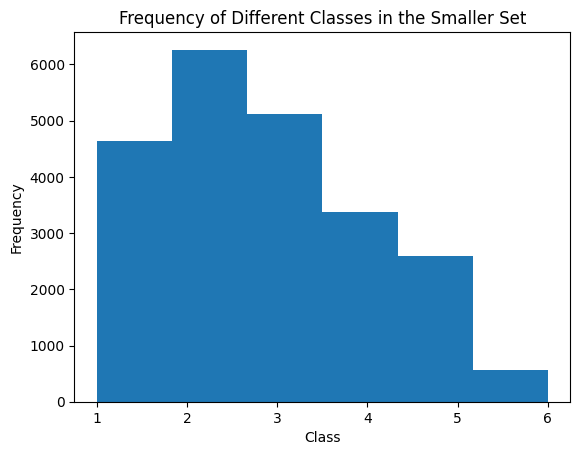

In [47]:
# print(y.shape)
plt.hist(y, bins=6)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Frequency of Different Classes in the Smaller Set')

Text(0.5, 1.0, 'Frequency of Different Classes in the Full Set')

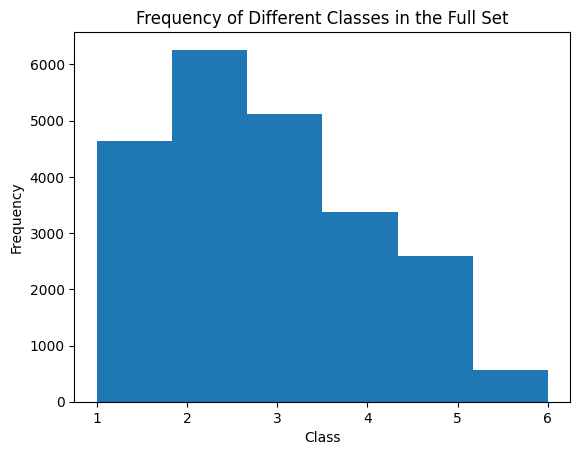

In [46]:
all_data = df.to_numpy()
y = all_data[:,19]
y = y.reshape(-1,1)
plt.hist(y, bins=6)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Frequency of Different Classes in the Full Set')